In [1]:
# Overall Time Property Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
# Load data

In [4]:
data= pd.read_excel('data_yellow.xlsx')

In [5]:
data_max = data.groupby('Patient ID').max()

In [6]:
subject = data.groupby('Patient ID')
subject

In [7]:
from datetime import datetime, timedelta
pids = data['Patient ID'].unique()
deltatime = []
starttime = []
endtime =[]
for pid in pids:
    start_time = datetime.strptime(subject.get_group(pid)['Time (min)'].values[0],"%M:%S")
    delta_start = timedelta(minutes=start_time.minute, seconds=start_time.second)
    end_time = datetime.strptime(subject.get_group(pid)['Time (min)'].values[-1],"%M:%S")
    delta_end = timedelta(minutes=end_time.minute, seconds=end_time.second)
    starttime.append((delta_start).seconds)
    endtime.append((delta_end).seconds)
    deltatime.append((delta_end-delta_start).seconds)

In [8]:
# Overall Time Property

(array([  1.,   0.,   1.,   2.,   1.,   2.,   3.,  28.,  34.,   2.]),
 array([  10. ,   83.7,  157.4,  231.1,  304.8,  378.5,  452.2,  525.9,
         599.6,  673.3,  747. ]),
 <a list of 10 Patch objects>)

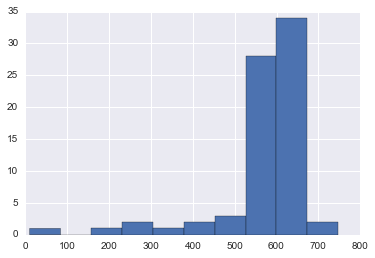

In [9]:
plt.hist(deltatime)

In [10]:
np.mean(deltatime)

570.6351351351351

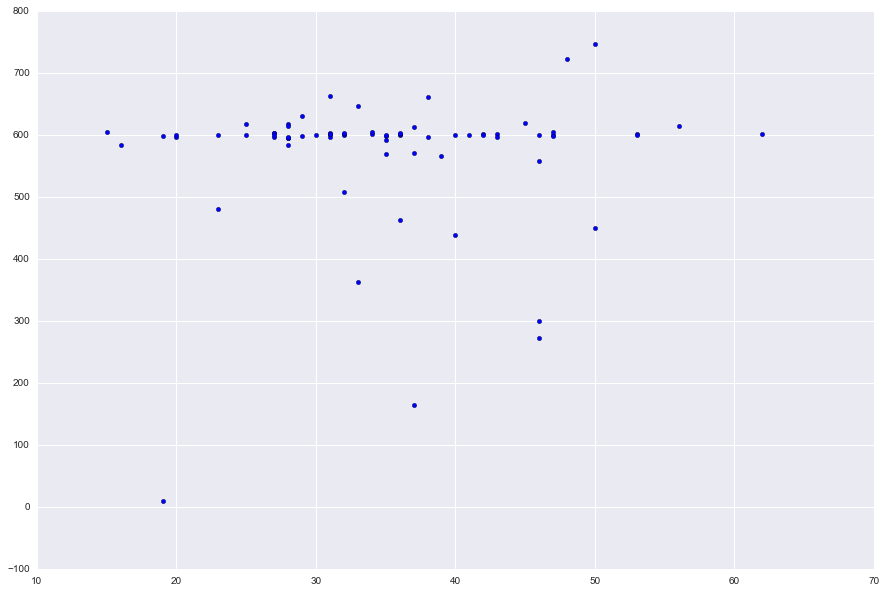

In [11]:
plt.figure(figsize=(15,10))
x = data_max['Age']
y = deltatime
plt.scatter(x,y)

In [12]:
data_plot = data_max[['Age', 'Sex']]
data_plot['Overall Time'] = deltatime

C:\Users\NMRL-AIO\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


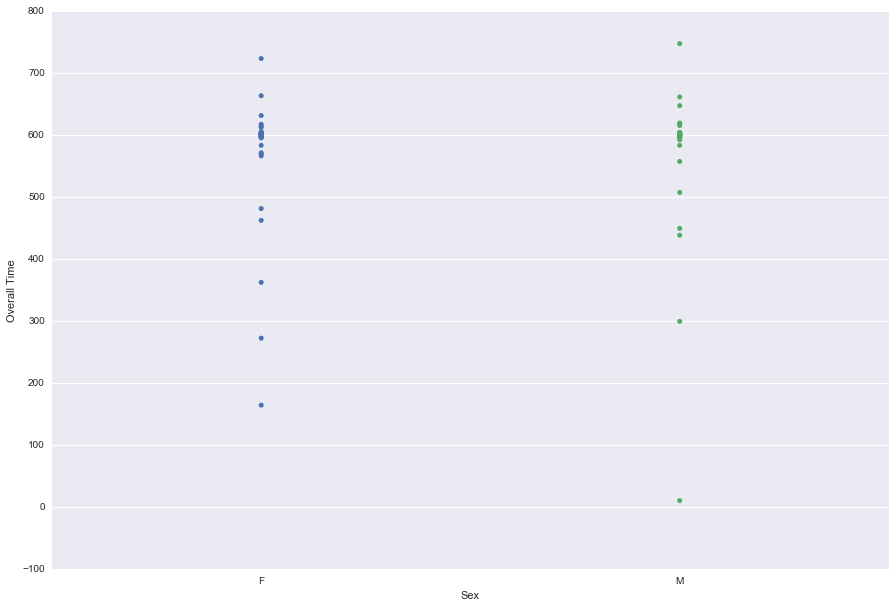

In [13]:
plt.figure(figsize=(15,10))
sns.stripplot(x='Sex', y='Overall Time', data = data_plot);

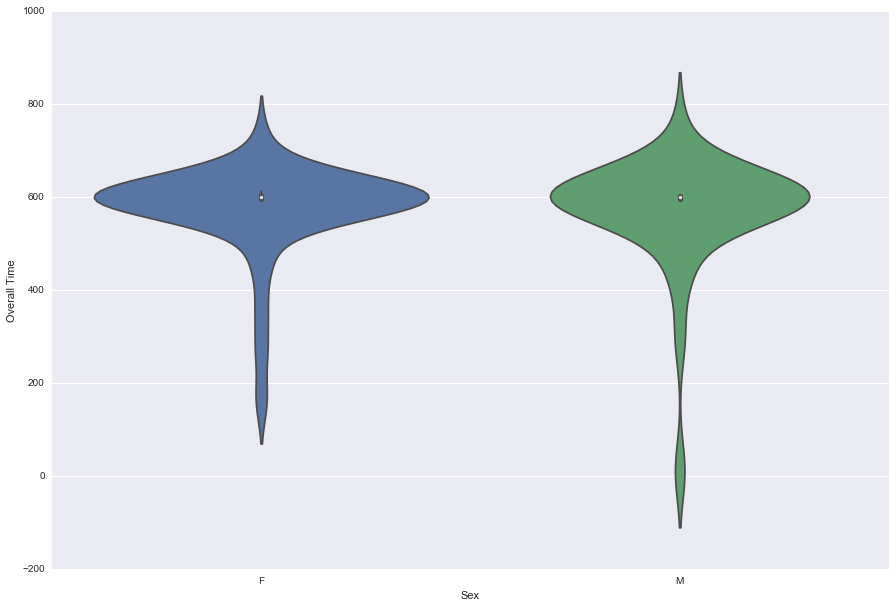

In [14]:
plt.figure(figsize=(15,10))
sns.violinplot(x='Sex', y='Overall Time', data = data_plot);